In [1]:
from attention_recreation.model import EncoderDecoder, make_encoder, make_input_id_encoder, make_decoder
from datasets import load_dataset
from tokenizers import Tokenizer, decoders
import torch
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# load data
ds = load_dataset("Helsinki-NLP/opus-100", "de-en", streaming=False)
en_generator = (x["translation"]["en"] for x in ds["train"])
de_generator = (x["translation"]["de"] for x in ds["train"])

# get tokenizers
en_tokenizer: Tokenizer = Tokenizer.from_file("../tokenizers/basic_en_tokenizer.json")
de_tokenizer: Tokenizer = Tokenizer.from_file("../tokenizers/basic_de_tokenizer.json")


# Preprocess and tokenize
def tokenize(example):
    en_encoded = en_tokenizer.encode(example["translation"]["en"])
    de_encoded = de_tokenizer.encode(example["translation"]["de"])
    return {"en_input_ids": en_encoded.ids, "de_input_ids": de_encoded.ids, "en_length": len(en_encoded.ids)}

tokenized_ds = ds.map(tokenize, remove_columns="translation", num_proc=os.cpu_count())
# filter out very long and short sentences they appear to be bad!
# tokenized_ds = tokenized_ds.filter(lambda x: (x["en_length"] >= 4) & (x["en_length"] <= 45), num_proc=os.cpu_count())

en_pad_id = en_tokenizer.token_to_id("[PAD]")
de_pad_id = de_tokenizer.token_to_id("[PAD]")

train_en_lengths = tokenized_ds["train"]["en_length"]

In [8]:
data = tokenized_ds["train"]["en_length"]

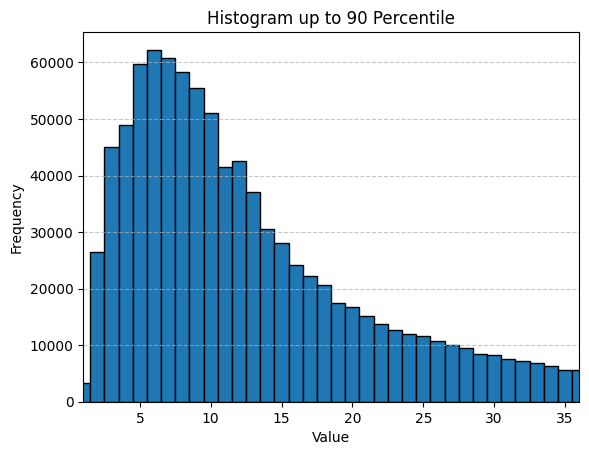

In [12]:
p_th = 90
percentile = np.percentile(data, 90)

# Create histogram
plt.hist(data, bins=range(min(data), max(data) + 2), edgecolor='black', align='left')
plt.title(f"Histogram up to {p_th} Percentile")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Set x-axis max to Q3 + 10
plt.xlim(left=min(data), right=percentile)
plt.show()
